In [2]:
"""
Created on Thu Feb 28 15:00:05 2019

@author: ga
"""
import numpy as np 
import random
import matplotlib.pyplot as plt
import matplotlib.patches as pa
from matplotlib import animation
from math import sqrt

In [10]:
def init_():
    ax.set_xlim(0,6)
    ax.set_ylim(0,6)
    rect1 = pa.Rectangle((1.5,2),2,0.3,fill=True,edgecolor='black')
    rect2 = pa.Rectangle((1.5,3.7),2,0.3,fill=True,edgecolor='black')
    rect3 = pa.Rectangle((3.2,2.3),0.3,1.4,fill=True,edgecolor='black')
    circle = pa.Circle((5,3),0.2,fill=True,color='y')
    for rect in [rect1,rect2,rect3,circle]:
        ax.add_patch(rect)
    plt.title('rrt')
    plt.axis('off')

In [4]:
# check wether pnew is in the obstacle
def check(p):
    if 1.5<=p[0]<=3.5 and 2<=p[1]<=4:
        if 1.5<p[0]<3.2 and 2.3<p[1]<3.7:
            return True
        else:
            return False
    else:
        return True

In [5]:
# generate the rrt
def dis(p1,p2):
    return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
def gen_route():
    tol = 0.2
    step = 0.2
    flag = True
    while flag:
        while True:
            prand = [random.random()*6,random.random()*6]
            pnear = line[1][np.argmin([dis(p,prand) for p in line[1]])]
            dnear = dis(pnear,prand)
            pnew = [(step*prand[0]+(dnear-step)*pnear[0])/dnear,
                    (step*prand[1]+(dnear-step)*pnear[1])/dnear]
            if check(pnew):
                break
        line[0].append(pnear)
        line[1].append(pnew)
        if dis(pnew,[5,3])<=tol:            
            flag = False

In [6]:
# select the final result
def choose_route():
    route = []
    begin = line[0][-1]
    route.append(line[1][-1])
    while True:
        route.append(begin)
        if begin == [2,3]:
            break
        i = line[1].index(begin)
        begin = line[0][i]
    return route

In [7]:
def update_dot_glo(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

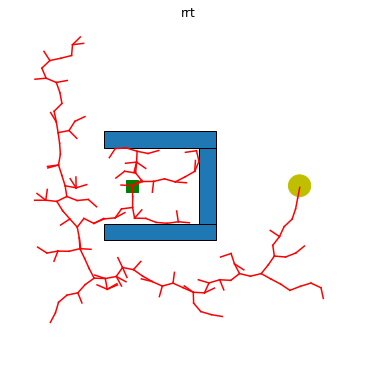

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
dot, = ax.plot([], [], 'gs',ms=12)
init_()
line = [[[2,3]],[[2,3]]]
gen_route()
for i in range(len(line[0])):
    plt.plot([line[0][i][0],line[1][i][0]],[line[0][i][1],line[1][i][1]],c='r')

route = choose_route()
ani = animation.FuncAnimation(fig, update_dot_glo, 
                              frames = route[::-1], interval =200)#, init_func=init)
ani.save('rrt.gif', writer='imagemagick', fps=30)
plt.show()